In [28]:
library(tidyverse)
tree_data <- read_csv("Sx.htdata (1).csv")

library(repr)
sxData <- tree_data |>
mutate(
    SITE = SITE,
    PROV = PROV,
    Height = Height,
    live = live,
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Latitude - P_Latitude,
    TX_Long = S_Longitude - P_Longitude,
    TX_Elev = S_Elevation - P_Elevation
) 
#head(tree_data)
glimpse(sxData)

Rows: 3240 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SITE
dbl (19): PROV, BLOCK, TREE, S_MAT, S_MCMT, S_MAP, S_MSP, S_Latitude, S_Long...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 3,240
Columns: 27
$ SITE        <chr> "MID", "MID", "MID", "MID", "MID", "MID", "MID", "MID", "M…
$ PROV        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3…
$ BLOCK       <dbl> 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4…
$ TREE        <dbl> 6, 4, 9, 9, 5, 1, 5, 7, 8, 4, 3, 2, 6, 7, 1, 3, 8, 2, 8, 1…
$ S_MAT       <dbl> 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9…
$ S_MCMT      <dbl> -12.9, -12.9, -12.9, -12.9, -12.9, -12.9, -12.9, -12.9, -1…
$ S_MAP       <dbl> 565, 565, 565, 565, 565, 565, 565, 565, 565, 565, 565, 565…
$ S_MSP       <dbl> 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247…
$ S_Latitude  <dbl> 54.19948, 54.19948, 54.19948, 54.19948, 54.19948, 54.19948…
$ S_Longitude <dbl> -125.002, -125.002, -125.002, -125.002, -125.002, -125.002…
$ S_Elevation <dbl> 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670…
$ P_MAT       <dbl> -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2…
$ P_MCMT      <d

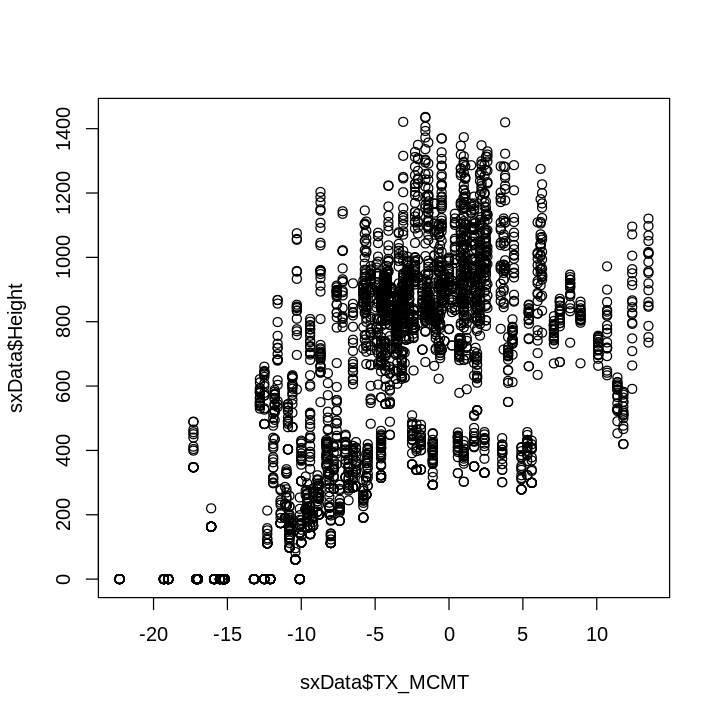

In [24]:
options(repr.plot.width = 6, repr.plot.height = 6)
plot(sxData$TX_MCMT, sxData$Height)

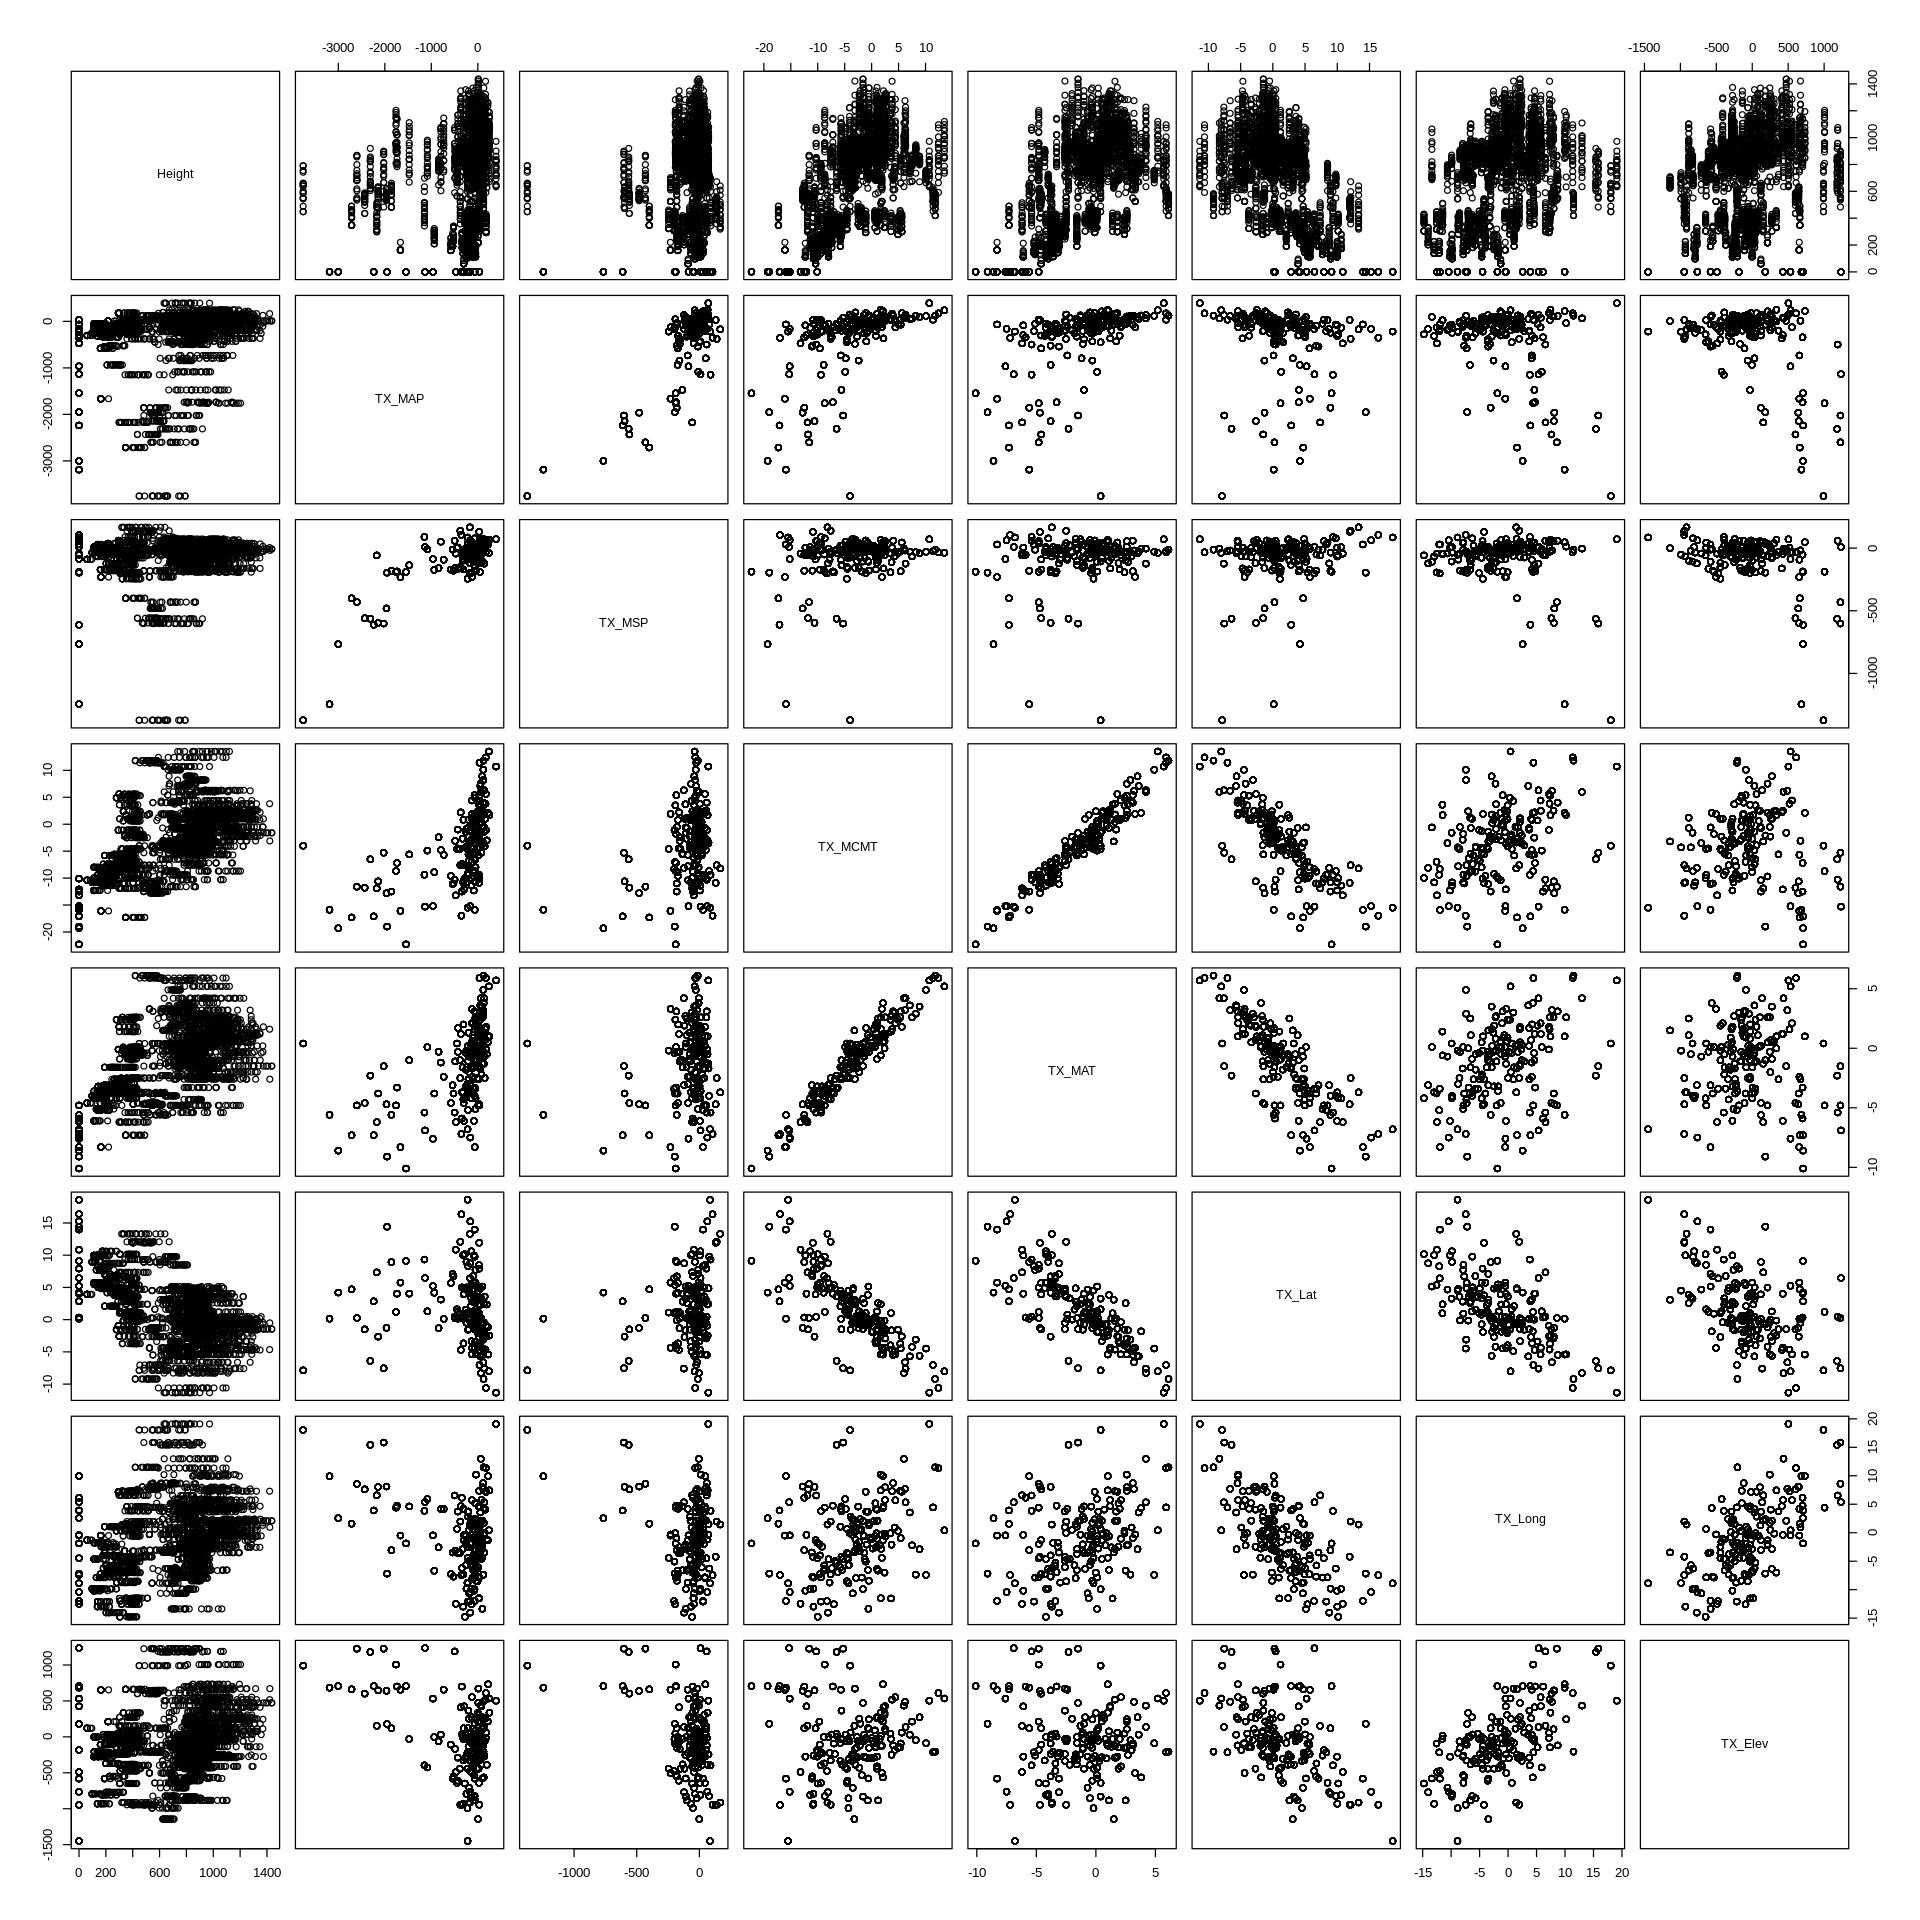

In [26]:
options(repr.plot.width = 16, repr.plot.height = 16)
pairs(~ Height + TX_MAP + TX_MSP + TX_MCMT + TX_MAT + TX_Lat + TX_Long + TX_Elev, data = sxData)

In [20]:
model.1 <- lm(Height ~ TX_MCMT + I(TX_MCMT^2), data = sxData)
summary(model.1)


Call:
lm(formula = Height ~ TX_MCMT + I(TX_MCMT^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-594.26 -204.23   28.12  185.00  687.41 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  820.62884    5.52075  148.64   <2e-16 ***
TX_MCMT       19.45572    0.86176   22.58   <2e-16 ***
I(TX_MCMT^2)  -1.78982    0.07085  -25.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 253.5 on 3237 degrees of freedom
Multiple R-squared:  0.4992,	Adjusted R-squared:  0.4989 
F-statistic:  1613 on 2 and 3237 DF,  p-value: < 2.2e-16


In [62]:
model.2 <- lm(Height ~ 
              I(TX_MCMT^2) + 
              I(TX_Lat^2) +
              I(TX_Lat) +
              I(TX_Long^2),
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ I(TX_MCMT^2) + I(TX_Lat^2) + I(TX_Lat) + 
    I(TX_Long^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-556.90 -177.72   20.15  165.50  596.31 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  837.54136    5.75654  145.49   <2e-16 ***
I(TX_MCMT^2)  -2.24485    0.06270  -35.80   <2e-16 ***
I(TX_Lat^2)    1.36406    0.12183   11.20   <2e-16 ***
I(TX_Lat)    -31.38647    1.00852  -31.12   <2e-16 ***
I(TX_Long^2)  -1.29661    0.07886  -16.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236 on 3235 degrees of freedom
Multiple R-squared:  0.5665,	Adjusted R-squared:  0.566 
F-statistic:  1057 on 4 and 3235 DF,  p-value: < 2.2e-16


In [63]:
model.2 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              TX_MAT + I(TX_MAT^2) +
              TX_MAP + I(TX_MAP^2) +
              TX_MSP + I(TX_MSP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long + I(TX_Long^2) +
              TX_Elev + I(TX_Elev^2),
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ TX_MCMT + I(TX_MCMT^2) + TX_MAT + I(TX_MAT^2) + 
    TX_MAP + I(TX_MAP^2) + TX_MSP + I(TX_MSP^2) + TX_Lat + I(TX_Lat^2) + 
    TX_Long + I(TX_Long^2) + TX_Elev + I(TX_Elev^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-548.32 -166.66   11.58  155.60  576.04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.311e+02  6.417e+00 129.513  < 2e-16 ***
TX_MCMT       2.703e+00  3.921e+00   0.689 0.490647    
I(TX_MCMT^2) -3.387e+00  1.938e-01 -17.478  < 2e-16 ***
TX_MAT       -2.472e-01  8.618e+00  -0.029 0.977119    
I(TX_MAT^2)   3.024e+00  8.461e-01   3.574 0.000357 ***
TX_MAP       -1.210e-01  2.630e-02  -4.602 4.34e-06 ***
I(TX_MAP^2)   7.618e-05  1.050e-05   7.255 5.01e-13 ***
TX_MSP        7.806e-01  8.971e-02   8.702  < 2e-16 ***
I(TX_MSP^2)  -1.607e-04  6.829e-05  -2.353 0.018697 *  
TX_Lat       -4.612e+01  4.053e+00 -11.381  < 2e-16 ***
I(TX_Lat^2)   1.603e+00  1.784e-01   8.987  < 2e-16 ***